## DALI machine optics

## Mirian 27 Jan 2025

# Linac section 
## particle tracking with SC


In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline
# import from Ocelot main modules and functions
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


In [5]:
from DALI_lattice import *

In [6]:
#Change RF parameters
phi=-0
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi

In [9]:
method = {"global": SecondTM}
# method = {"global": TransferMap}
lat_DALI_Linac = MagneticLattice(T02T1,method=method) 

In [12]:
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

sc3 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 3

In [13]:
p_array_init = load_particle_array("injection_gun_beamm.npz")

In [14]:
navi = Navigator(lat_DALI_Linac)

# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc3, lat_DALI_Linac.sequence[0], lat_DALI_Linac.sequence[-1])
#navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# definiing of unit step in [m]
navi.unit_step = 0.02


p_array = deepcopy(p_array_init)
start = time.time()
tws_track, p_array = track(lat_DALI_Linac, p_array, navi)
print("\n time exec:", time.time() - start, "sec")

z = 14.094 / 14.094000000000001. Applied: 1. Applied: SpaceChargee
 time exec: 5.059638977050781 sec


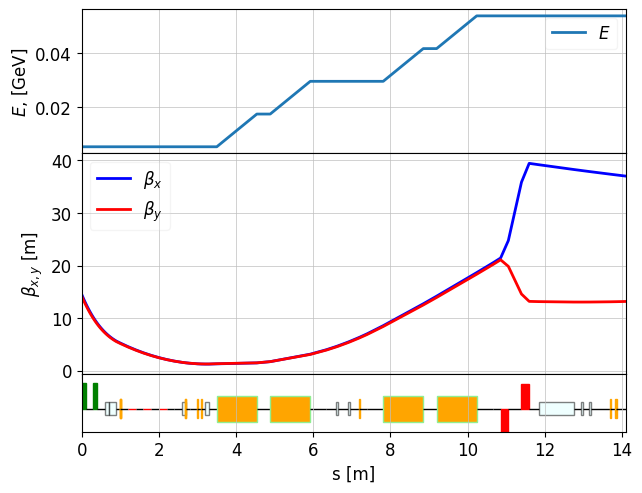

In [17]:
plot_opt_func(lat_DALI_Linac, tws_track, top_plot=["E"],fig_name=0, legend=False)
plt.show()

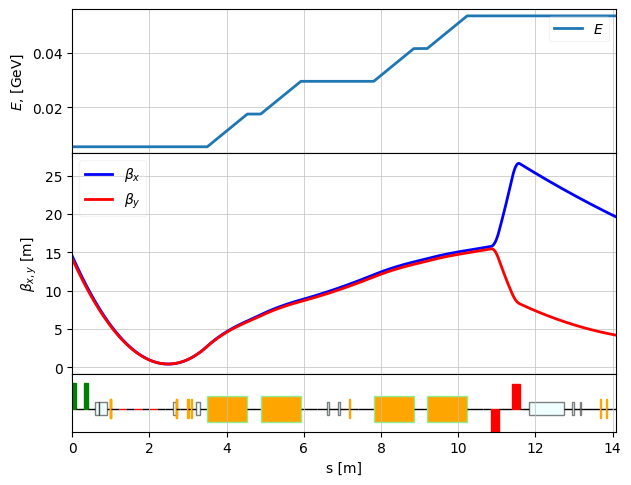

In [19]:
tws_Tranport_to_Linac = twiss(lat_DALI_Linac,tws_track[0] ,nPoints=1000)

# plot optical functions.
plot_opt_func(lat_DALI_Linac, tws_Tranport_to_Linac, top_plot = ["E"], legend=False, font_size=10)
plt.show()

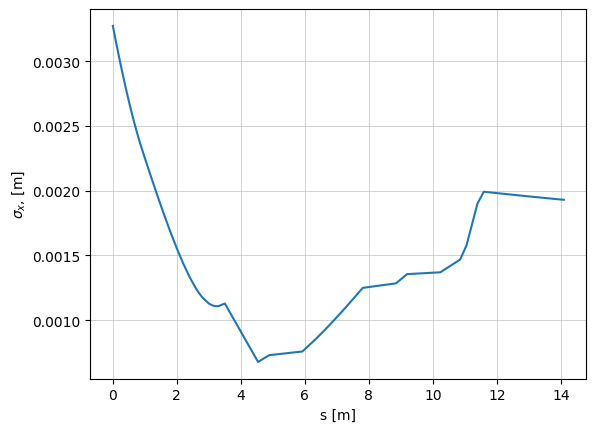

In [20]:
sigma_x = np.sqrt([tw.xx for tw in tws_track])
s = [tw.s for tw in tws_track]

plt.plot(s, sigma_x)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$, [m]")
plt.show()


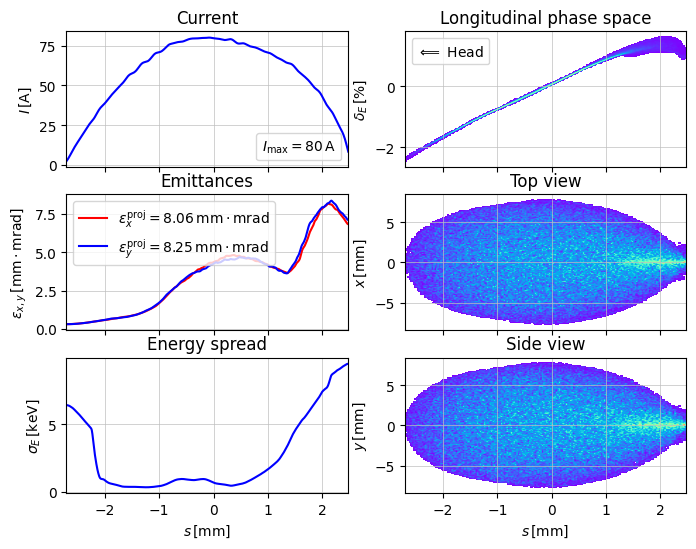

In [21]:
show_e_beam(p_array_init, figsize=(8,6))
plt.show()

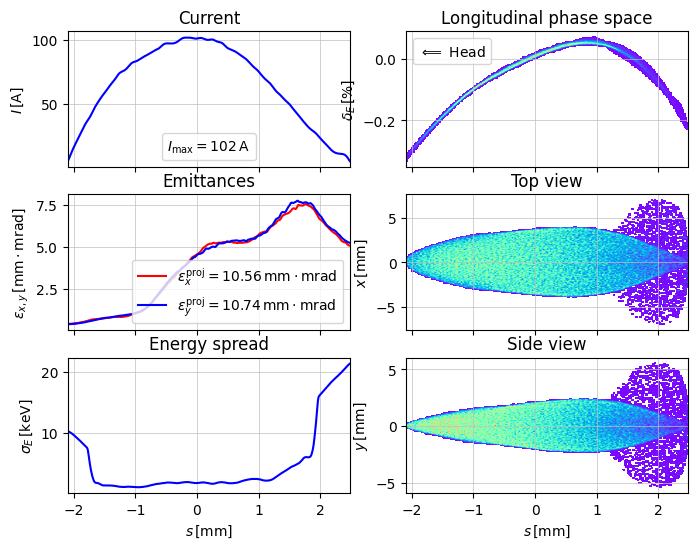

In [22]:
show_e_beam(p_array, figsize=(8,6))
plt.show()